In [1]:
# Load Package
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [2]:
# Load data 

hr = pd.read_csv('HR_data.csv') # Data has been pre-process in Excel since the amount of data is small.
hr.head()

Attrition  Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0          1   41       1102                 1          2              1   
1          0   49        279                 8          1              1   
2          1   37       1373                 2          2              1   
3          0   33       1392                 3          4              1   
4          0   27        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0               1                        2          94               3   
1               2                        3          61               2   
2               4                        4          92               2   
3               5                        4          56               3   
4               7                        1          40               3   

       ...        YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0      ...                     6                   4                        0   
1      ...                    10                   7                        1   
2      ...                     0                   0                        0   
3      ...                     8                   7                        3   
4      ...                     2                   2                        2   

   YearsWithCurrManager     BusinessTravel              Department  \
0                     5      Travel_Rarely                   Sales   
1                     7  Travel_Frequently  Research & Development   
2                     0      Travel_Rarely  Research & Development   
3                     0  Travel_Frequently  Research & Development   
4                     2      Travel_Rarely  Research & Development   

   EducationField  Gender                JobRole  MaritalStatus  
0   Life Sciences  Female        Sales Executive         Single  
1   Life Sciences    Male     Research Scientist        Married  
2     Other_Major    Male  Laboratory Technician         Single  
3   Life Sciences  Female     Research Scientist        Married  
4         Medical    Male  Laboratory Technician        Married  

[5 rows x 35 columns]

In [3]:
# Looking for nulls
# hr.isnull().any()  -->  No missing Value

In [4]:
# Data Dimension
print('The dimesion of the data set is: ', hr.shape)

The dimesion of the data set is:  (1470, 35)


In [5]:
hr.describe()

Attrition          Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean      0.161224    36.923810   802.485714          9.192517     2.912925   
std       0.367863     9.135373   403.509100          8.106864     1.024165   
min       0.000000    18.000000   102.000000          1.000000     1.000000   
25%       0.000000    30.000000   465.000000          2.000000     2.000000   
50%       0.000000    36.000000   802.000000          7.000000     3.000000   
75%       0.000000    43.000000  1157.000000         14.000000     4.000000   
max       1.000000    60.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  \
count         1470.0     1470.000000              1470.000000  1470.000000   
mean             1.0     1024.865306                 2.721769    65.891156   
std              0.0      602.024335                 1.093082    20.329428   
min              1.0        1.000000                 1.000000    30.000000   
25%              1.0      491.250000                 2.000000    48.000000   
50%              1.0     1020.500000                 3.000000    66.000000   
75%              1.0     1555.750000                 4.000000    83.750000   
max              1.0     2068.000000                 4.000000   100.000000   

       JobInvolvement          ...           RelationshipSatisfaction  \
count     1470.000000          ...                        1470.000000   
mean         2.729932          ...                           2.712245   
std          0.711561          ...                           1.081209   
min          1.000000          ...                           1.000000   
25%          2.000000          ...                           2.000000   
50%          3.000000          ...                           3.000000   
75%          3.000000          ...                           4.000000   
max          4.000000          ...                           4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         1470.0       1470.000000        1470.000000   
mean            80.0          0.793878          11.279592   
std              0.0          0.852077           7.780782   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
max             80.0          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 29 columns]

+ Drop off EmployeeCount and Over 18. All values are 1 
+ Drop off Standard Hours.  All 80, for 2 weeks??
+ Drop off Employee Number

In [6]:
hr = hr.drop(columns= ['EmployeeCount', 'Over18', 'EmployeeNumber', 'StandardHours'], axis=1)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

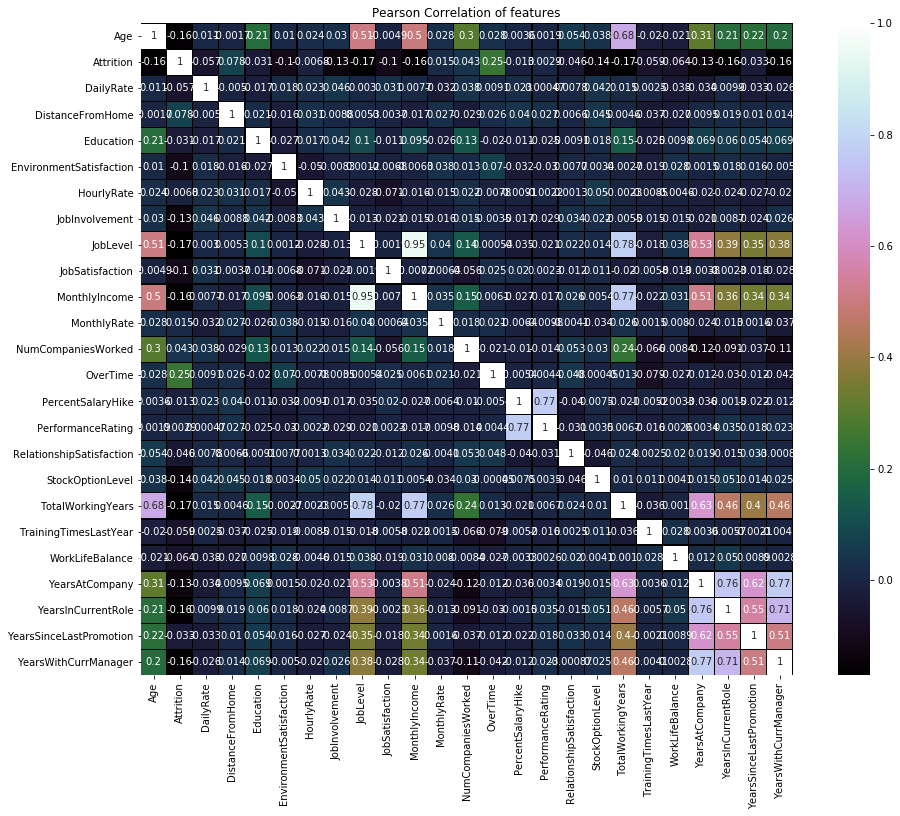

In [8]:
str_list = [] # empty list to contain columns with strings (words)

for colname, colvalue in hr.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = hr.columns.difference(str_list) 
# Create Dataframe containing only numerical features
hr_num = hr[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(hr_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [9]:
# One Hot Encoding 
hr.iloc[:, 25:] = hr.iloc[:, 25:].astype('category')

In [10]:
# One Hot Encoding 
hr_dummies = pd.get_dummies(hr.iloc[:, 25:])

hr = hr.drop(columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole','MaritalStatus'], axis = 1)

hr = pd.concat([hr, hr_dummies], axis=1)

In [11]:
hr.columns

Index(['Attrition', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other_Major', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representativ

In [12]:
# Train and Validate Random Forest Classifier Models 

# Split Training and Testing  set 

# Labels are the values we want to predict
labels = hr['Attrition']

# Remove the labels from the dataset
hr = hr.drop(columns='Attrition', axis =1)

# Saving feature names for later use
features = list(hr.columns)

In [13]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(hr, labels, test_size=0.2, random_state=8504)

In [14]:
print('Training Data Shape:', train_data.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Data Shape:', test_data.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Data Shape: (1176, 50)
Training Labels Shape: (1176,)
Testing Data Shape: (294, 50)
Testing Labels Shape: (294,)


In [15]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train_data,train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(hr, round(importance, 2)) for hr, importance in zip(features, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
fimp = pd.DataFrame(feature_importances, columns=['Feature', 'Importance'])
fimp[fimp.Importance > 0]

Feature  Importance
0                       MonthlyIncome        0.07
1                                 Age        0.06
2                   TotalWorkingYears        0.06
3                           DailyRate        0.05
4                    DistanceFromHome        0.05
5                          HourlyRate        0.05
6                         MonthlyRate        0.05
7                            OverTime        0.05
8                      YearsAtCompany        0.04
9             EnvironmentSatisfaction        0.03
10                     JobInvolvement        0.03
11                 NumCompaniesWorked        0.03
12                  PercentSalaryHike        0.03
13                   StockOptionLevel        0.03
14                 YearsInCurrentRole        0.03
15               YearsWithCurrManager        0.03
16                          Education        0.02
17                           JobLevel        0.02
18                    JobSatisfaction        0.02
19           RelationshipSatisfaction        0.02
20              TrainingTimesLastYear        0.02
21                    WorkLifeBalance        0.02
22            YearsSinceLastPromotion        0.02
23               MaritalStatus_Single        0.02
24          BusinessTravel_Non-Travel        0.01
25   BusinessTravel_Travel_Frequently        0.01
26       BusinessTravel_Travel_Rarely        0.01
27  Department_Research & Development        0.01
28                   Department_Sales        0.01
29       EducationField_Life Sciences        0.01
30           EducationField_Marketing        0.01
31             EducationField_Medical        0.01
32    EducationField_Technical Degree        0.01
33                      Gender_Female        0.01
34                        Gender_Male        0.01
35      JobRole_Laboratory Technician        0.01
36         JobRole_Research Scientist        0.01
37            JobRole_Sales Executive        0.01
38       JobRole_Sales Representative        0.01
39             MaritalStatus_Divorced        0.01
40              MaritalStatus_Married        0.01

+ Feature importances are close 

In [17]:
# Generate Prediction 
predictions = clf.predict(test_data)

In [18]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(test_labels, predictions),6) * 100, '%')

Accuracy: 87.41499999999999 %


In [19]:
# Skip Partial Dependence Plot for now 



In [20]:
# Use LIME
import lime
import lime.lime_tabular

In [23]:
# Pre-process 
# Extract varible names
feature_names = list(train_data.columns)

# Identify the category variable
cat_feature = train_data.iloc[:, 24:]

# Extract category variable names
cat_names = list(cat_feature.columns)

In [25]:
# Instead of change pd. Dataframe to np.array, using .values
# Reset Indexes

test_data = test_data.reset_index(drop = True)
test_labels = test_labels.reset_index(drop=True)

In [59]:
explainer = lime.lime_tabular.LimeTabularExplainer(train_data.values, feature_names= feature_names, 
                                                   categorical_features=cat_feature, 
                                                   categorical_names=cat_names, verbose=True, mode='classification')

# For Binary Classifion problem, let LIME automatically determine the class. 

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [60]:
# Teach the model to return predicted probability 
predict_clf = lambda x: clf.predict_proba(x).astype(float)

In [61]:
i = 30
exp = explainer.explain_instance(test_data.iloc[i,:].values, predict_clf, num_features=10)

Intercept 0.2666662348706671
Prediction_local [0.25154129]
Right: 0.2


In [62]:
print('Actual Value: ', test_labels[i])

Actual Value:  1


In [63]:
exp.show_in_notebook(show_table=True)

In [64]:
i = 85
exp = explainer.explain_instance(test_data.iloc[i,:].values, predict_clf, num_features=10)

Intercept 0.298312749368276
Prediction_local [0.23969557]
Right: 0.16


In [65]:
print('Actual Value: ', test_labels[i])

Actual Value:  0


In [66]:
exp.show_in_notebook(show_table=True)

In [68]:
explainer1 = lime.lime_tabular.LimeTabularExplainer(train_data.values, discretize_continuous = False, 
                                                    feature_names= feature_names, 
                                                    verbose=True, mode='classification')

# For Binary Classifion problem, let LIME automatically determine the class. 

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [69]:
i = 30
exp = explainer1.explain_instance(test_data.iloc[i,:].values, predict_clf, num_features=10)

Intercept 0.18670387099871893
Prediction_local [0.26779358]
Right: 0.2


In [70]:
exp.show_in_notebook(show_table=True)

In [71]:
i = 30
exp1 = explainer.explain_instance(test_data.iloc[i,:].values, clf.predict, num_features=10)

NotImplementedError: LIME does not currently support classifier models without probability scores. If this conflicts with your use case, please let us know: https://github.com/datascienceinc/lime/issues/16